## Task2

In [2]:
# Import necessary libraries
import urllib.request
import os
import zipfile
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Define the URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"

# Define the local file path where you want to save the dataset
local_file_path = "drug_consumption_data.csv"  # You can change the file extension as needed

# Send an HTTP GET request to the URL
response = requests.get(url)

# Write the content of the response to a local file
with open(local_file_path, 'wb') as file:
    file.write(response.content)

#print(f"Dataset downloaded and saved as {local_file_path}")
dataset = pd.read_csv("drug_consumption_data.csv")
# Define the column names for the input features
dc_features = ["Age", "Gender", "Education", "Country", "Ethnicity", "Neuroticism", "Extraversion",
              "Openness", "Agreeableness", "Conscientiousness", "Impulsiveness", "Sensation"]

# Define the column names for the target/output features
dc_output = ["ID","Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy",
              "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]
dc_columns = dc_features + dc_output

# Load the dataset with the specified column names
dataset = pd.read_csv("drug_consumption_data.csv", names=dc_columns)
# Print the first few rows (the dataset head)
dataset.iloc[:,-20:]

,ID,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1.22470,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


### a) Multiclass classification models

In [4]:
# Define the selected output features
selected_features = ["Cannabis", "Nicotine"]

# Define the input features
input_features = dc_features 

# Split the dataset into input (X) and output (y)
X = dataset[input_features]
y = dataset[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1.Logistic Regression

In [5]:
# Train the first multiclass classification model (Logistic Regression) for 'Cannabis'
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train["Cannabis"])
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test["Cannabis"], y_pred1)

# Train the second multiclass classification model (Logistic Regression) for 'Nicotine'
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train, y_train["Nicotine"])
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test["Nicotine"], y_pred2)

# Print the accuracies
print(f"Accuracy for Cannabis (Logistic Regression): {accuracy1:.2f}")
print(f"Accuracy for Nicotine (Logistic Regression): {accuracy2:.2f}")

Accuracy for Cannabis (Logistic Regression): 0.40
Accuracy for Nicotine (Logistic Regression): 0.38


### 2.RandomForest

In [6]:
# Train the first multiclass classification model (RandomForest) for 'Cannabis'
model1 = RandomForestClassifier()
model1.fit(X_train, y_train["Cannabis"])
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test["Cannabis"], y_pred1)

# Train the second multiclass classification model (RandomForest) for 'Nicotine'
model2 = RandomForestClassifier()
model2.fit(X_train, y_train["Nicotine"])
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test["Nicotine"], y_pred2)

# Print the accuracies
print(f"Accuracy for Cannabis (RandomForest): {accuracy1:.2f}")
print(f"Accuracy for Nicotine (RandomForest): {accuracy2:.2f}")

Accuracy for Cannabis (RandomForest): 0.41
Accuracy for Nicotine (RandomForest): 0.36


### 3.Decision Tree

In [7]:
# Train the first multiclass classification model (Decision Tree) for 'Cannabis'
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train["Cannabis"])
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test["Cannabis"], y_pred1)

# Train the second multiclass classification model (Decision Tree) for 'Nicotine'
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train["Nicotine"])
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test["Nicotine"], y_pred2)

# Print the accuracies
print(f"Accuracy for Cannabis (Decision Tree): {accuracy1:.2f}")
print(f"Accuracy for Nicotine (Decision Tree): {accuracy2:.2f}")

Accuracy for Cannabis (Decision Tree): 0.29
Accuracy for Nicotine (Decision Tree): 0.26


## Summary:
The use of different machine learning models to predict drug consumption behaviors for "Cannabis" and "Nicotine". While Logistic Regression achieved relatively higher accuracy compared to RandomForest and Decision Tree.

## b

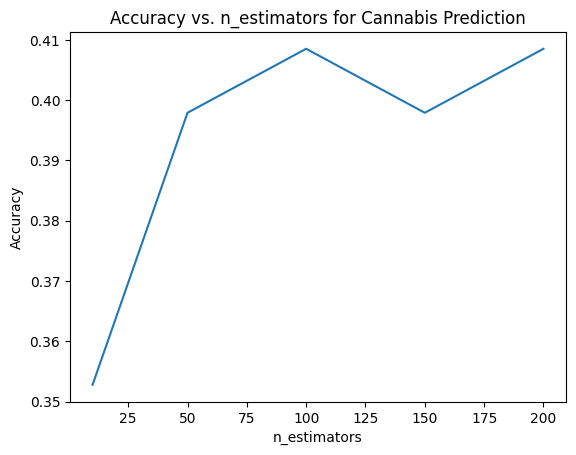

In [9]:
# Selected feature
selected_feature = "Cannabis"

# Define different values for n_estimators
n_estimators_values = [10, 50, 100, 150, 200]

accuracies = []

for n_estimators in n_estimators_values:
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train[selected_feature])
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test[selected_feature], y_pred)
    accuracies.append(accuracy)

# Plot the accuracy as a function of n_estimators
plt.plot(n_estimators_values, accuracies)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. n_estimators for Cannabis Prediction")
plt.show()

### C. Train the Random Forest multiclass classification model to predict 16 output features

In [10]:
# Define the selected 16 output features (excluding "Cannabis" and "Nicotine")
selected_features = ["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Choc", "Coke", "Crack", "Ecstasy",
                      "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Semer", "VSA"]
# Mapping of class labels to class names
class_mapping = {
    "CL0": "Class 0",
    "CL1": "Class 1",
    "CL2": "Class 2",
    "CL3": "Class 3",
    "CL4": "Class 4",
    "CL5": "Class 5",
    "CL6": "Class 6"
}

# Replace the class labels in the dataset with class names
for column in selected_features:
    dataset[column] = dataset[column].map(class_mapping)
# Define the input features
input_features = dc_features  

# Split the dataset into input (X) and output (y)
X = dataset[input_features]
y = dataset[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest multiclass classification model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy for each feature
accuracies = {}
for i, feature in enumerate(selected_features):
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    accuracies[feature] = accuracy

# Print the accuracies for each feature
print('Random Forest multiclass classification model to predict 16 output features Accuracy:')
for feature, accuracy in accuracies.items():
    print(f"Accuracy for {feature}: {accuracy:.2f}")

Random Forest multiclass classification model to predict 16 output features Accuracy:
Accuracy for Alcohol: 0.38
Accuracy for Amphet: 0.52
Accuracy for Amyl: 0.69
Accuracy for Benzos: 0.56
Accuracy for Caff: 0.73
Accuracy for Choc: 0.42
Accuracy for Coke: 0.60
Accuracy for Crack: 0.89
Accuracy for Ecstasy: 0.55
Accuracy for Heroin: 0.86
Accuracy for Ketamine: 0.82
Accuracy for Legalh: 0.62
Accuracy for LSD: 0.60
Accuracy for Meth: 0.75
Accuracy for Mushrooms: 0.51
Accuracy for Semer: 1.00
Accuracy for VSA: 0.77


### d.

In [68]:
output_feature = ["Alcohol", "Amphet", "Amyl"]
# Define different setups
setups = {
    "setups 1": (["Never Used", "Used over a Decade Ago"], ["CL0", "CL1"]),
    "setups 2": (["Never Used", "Used over a Decade Ago", "Used in Last Decade"], ["CL0", "CL1", "CL2"]),
    "setups 3": (["Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year"], ["CL0", "CL1", "CL2", "CL3"])
}

# Create a DataFrame to store the results
results = pd.DataFrame(columns=["Class"] + dc_output)

# Iterate over setups
for setup, (class_0_vars, class_1_vars) in setups.items():
    # Create a new DataFrame for the current setup
    setup_df = pd.DataFrame(columns=["Class"] + dc_output)

    # Add the class names to the DataFrame
    setup_df["Class"] = class_0_vars + class_1_vars
    
    # Define the fraction_class_0 based on some hypothetical value (replace with your actual data)
    fraction_class_0 = 25.5  # For example, if the fraction is 25.5%

    # Now you can proceed with the rest of your code
    fraction_class_0_str = str(fraction_class_0).strip('%')
    fraction_class_0_float = float(fraction_class_0_str) / 100


    # Now set the value in the DataFrame after conversion
    setup_df.loc[setup_df["Class"] == class_0_vars[0], f"{output_feature} Fraction"] = fraction_class_0_float


    # Iterate over output features
    for output_feature in dc_output:
        # Calculate the number of cases and fraction for each class and output feature
        cases_class_0 = dataset[(dataset[output_feature] == class_0_vars[0]) | (dataset[output_feature] == class_0_vars[1])].shape[0]
        cases_class_1 = dataset[(dataset[output_feature] != class_0_vars[0]) & (dataset[output_feature] != class_0_vars[1])].shape[0]

        total_cases = cases_class_0 + cases_class_1
        fraction_class_0 = (cases_class_0 / total_cases) * 100
        fraction_class_1 = (cases_class_1 / total_cases) * 100

        # Add the results to the DataFrame
        setup_df.loc[setup_df["Class"] == class_0_vars[0], output_feature] = cases_class_0
        setup_df.loc[setup_df["Class"] == class_0_vars[0], f"{output_feature} Fraction"] = f"{fraction_class_0:.2f}%"

        setup_df.loc[setup_df["Class"] == class_0_vars[1], output_feature] = cases_class_1
        setup_df.loc[setup_df["Class"] == class_0_vars[1], f"{output_feature} Fraction"] = f"{fraction_class_1:.2f}%"

    # Append the results for the current setup to the overall results
    results = pd.concat([results, setup_df], ignore_index=True)

# Print the results
print(results)

C:\Users\Bindu\AppData\Local\Temp\ipykernel_39316\170513431.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  setup_df.loc[setup_df["Class"] == class_0_vars[0], f"{output_feature} Fraction"] = f"{fraction_class_0:.2f}%"
C:\Users\Bindu\AppData\Local\Temp\ipykernel_39316\170513431.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  setup_df.loc[setup_df["Class"] == class_0_vars[0], f"{output_feature} Fraction"] = f"{fraction_class_0:.2f}%"
C:\Users\Bindu\AppData\Local\Temp\ipykernel_39316\170513431.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%' has dtype incompatible

C:\Users\Bindu\AppData\Local\Temp\ipykernel_39316\170513431.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  setup_df.loc[setup_df["Class"] == class_0_vars[0], f"{output_feature} Fraction"] = f"{fraction_class_0:.2f}%"
C:\Users\Bindu\AppData\Local\Temp\ipykernel_39316\170513431.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  setup_df.loc[setup_df["Class"] == class_0_vars[0], f"{output_feature} Fraction"] = f"{fraction_class_0:.2f}%"
C:\Users\Bindu\AppData\Local\Temp\ipykernel_39316\170513431.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%' has dtype incompatible

                     Class    ID Alcohol Amphet  Amyl Benzos  Caff Cannabis  \
0               Never Used     0       0      0     0      0     0        0   
1   Used over a Decade Ago  1885    1885   1885  1885   1885  1885     1885   
2                      CL0   NaN     NaN    NaN   NaN    NaN   NaN      NaN   
3                      CL1   NaN     NaN    NaN   NaN    NaN   NaN      NaN   
4               Never Used     0       0      0     0      0     0        0   
5   Used over a Decade Ago  1885    1885   1885  1885   1885  1885     1885   
6      Used in Last Decade   NaN     NaN    NaN   NaN    NaN   NaN      NaN   
7                      CL0   NaN     NaN    NaN   NaN    NaN   NaN      NaN   
8                      CL1   NaN     NaN    NaN   NaN    NaN   NaN      NaN   
9                      CL2   NaN     NaN    NaN   NaN    NaN   NaN      NaN   
10              Never Used     0       0      0     0      0     0        0   
11  Used over a Decade Ago  1885    1885   1885  188

C:\Users\Bindu\AppData\Local\Temp\ipykernel_39316\170513431.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  setup_df.loc[setup_df["Class"] == class_0_vars[0], f"{output_feature} Fraction"] = f"{fraction_class_0:.2f}%"
C:\Users\Bindu\AppData\Local\Temp\ipykernel_39316\170513431.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  setup_df.loc[setup_df["Class"] == class_0_vars[0], f"{output_feature} Fraction"] = f"{fraction_class_0:.2f}%"
C:\Users\Bindu\AppData\Local\Temp\ipykernel_39316\170513431.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%' has dtype incompatible